In [72]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from matplotlib.lines import Line2D
import plotly.express as px

# Read Data

First, let's convert the csv files to pandas dataframes so we can plot them later.

In [20]:
pacers = pd.read_csv('pacers_results_four_factors.csv')
league = pd.read_csv('league_avg_four_factors.csv')
pacers[pacers.columns[2:]] = pacers[pacers.columns[2:]].multiply(100) #convert decimals to percentages 
league[league.columns[1:]] = league[league.columns[1:]].multiply(100
)
pacers.head()

,game_date,win,efg_pct,opp_efg_pct,oreb_pct,opp_oreb_pct,tov_pct,opp_tov_pct,ftm_rate,opp_ftm_rate
0,2/8/2023,False,58.3,50.6,17.4,34.9,11.6,13.7,25.641026,45.569620
1,1/20/2023,False,48.8,69.9,43.1,32.4,20.6,18.0,34.523809,21.686747
2,1/29/2023,False,51.3,53.4,36.4,40.4,19.8,9.9,24.050633,19.101124
3,3/25/2023,False,61.5,63.0,36.4,48.8,16.7,12.7,12.500000,22.916667
4,10/31/2022,False,53.4,60.6,33.3,21.1,23.1,19.0,18.390805,23.750000


# Effective Field Goal %

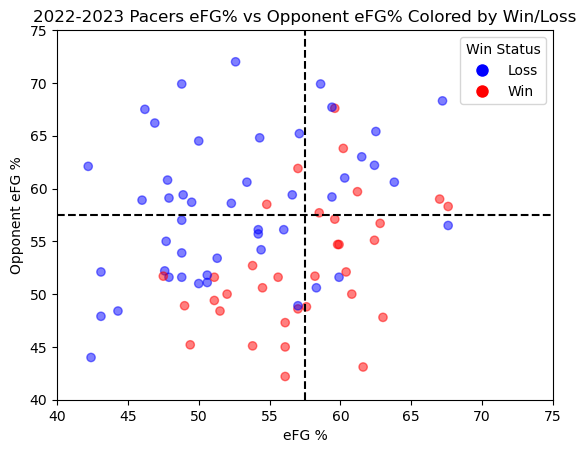

In [71]:
fig, ax = plt.subplots()
scatter = plt.scatter(x = pacers['efg_pct'], y = pacers['opp_efg_pct'], c = pacers['win'], cmap = 'bwr', alpha = 0.5) #create scatter plot

px.scatter( )
# Create a custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Loss'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Win')]

# Add the legend to the plot
legend = ax.legend(handles=legend_elements, title='Win Status')

# Set labels for x and y axes
ax.set_xlabel('eFG %')
ax.set_ylabel('Opponent eFG %')

# Add quadrants
ax.axhline(y=57.5, color='black', linestyle='--')  # Horizontal line at y = 0.5
ax.axvline(x=57.5, color='black', linestyle='--')  # Vertical line at x = 0.5

# Normalize both axes
ax.set_xlim(40, 75)
ax.set_ylim(40, 75)

ax.set_title("2022-2023 Pacers eFG% vs Opponent eFG% Colored by Win/Loss")

plt.show()